## Halotools correlation function

In [1]:
import numpy as np
import matplotlib.pyplot
import halotools
import halotools.mock_observables
import matplotlib.pyplot as plt
import Corrfunc

**TO DO:**

In [2]:
def bins_centers(bins_edges):
    """Assuming edges spaces in log and that input is not in log10.."""
    bins_edges = np.log10(bins_edges)
    centers = list()
    for i in range(len(bins_edges)-1):
        centers.append((bins_edges[i+1]+bins_edges[i])/2)
    return np.power(10, np.array(centers))

## Load the catalog and cut some parts off

In [32]:
catalog = np.load("../Catalog_Baryon/Catalog_BMF_Iter0_Alpha0,0.npy")


hm = np.log10(catalog['mvir'])
ids = np.where(np.logical_and(9 <= hm, hm <= 14.5))
x = catalog['x'][ids]
y = catalog['y'][ids]
z = catalog['z'][ids]

coords = np.vstack((x, y, z)).T

rp_bins = np.logspace(-1, np.log10(30), 100)

In [33]:
# # Test halotools
wp = halotools.mock_observables.wp(coords, rp_bins,pi_max=40,
#                                    period=400, num_threads=8)

# Test corrfunc, this one is about 10 times faster
wp2 = Corrfunc.theory.wp(boxsize=400, pimax=40, nthreads=8,
                         binfile=rp_bins, X=x, Y=y, Z=z)
np.save('wp2.npy', wp2)

In [ ]:
# wp2 = np.load('wp2.npy')

## Plot the $w_p$ correlation function:

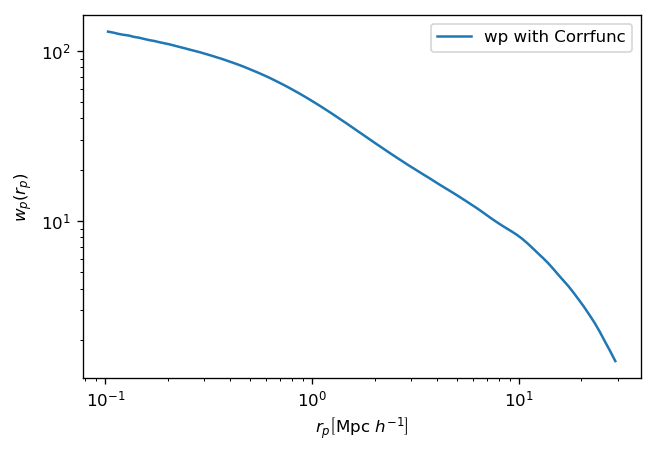

In [36]:
x = bins_centers(rp_bins)


# This one should later be averaged in bins
plt.figure(dpi=120)
plt.loglog(x, wp2['wp'], label='wp with Corrfunc')
# plt.loglog(x, wp, label='wp with Halotools')
plt.ylabel(r'$w_p\left(r_p\right)$')
plt.xlabel(r'$r_p\left[\mathrm{Mpc}\ h^{-1}\right]$')
plt.legend()
plt.show()